# Analyzing Ethereum, Bitcoin, and 1200+ other Cryptocurrencies using Pandas

This notebook is an adaptation of the blog post [Analyzing Ethereum, Bitcoin, and 1200+ other Cryptocurrencies using PostgreSQL](https://blog.timescale.com/analyzing-ethereum-bitcoin-and-1200-cryptocurrencies-using-postgresql-3958b3662e51)

Here are [instructions on how to download the data](https://blog.timescale.com/analyzing-ethereum-bitcoin-and-1200-cryptocurrencies-using-postgresql-downloading-the-dataset-a1bbc2d4d992)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [3]:
btc_prices = pd.read_csv('btc_prices.csv')
index = pd.DatetimeIndex(btc_prices.time).normalize()
btc_prices.index = index
btc_prices.drop('time', axis=1, inplace=True)
btc_usd_prices = btc_prices[btc_prices['currency_code'] == 'USD']
btc_eur_prices = btc_prices[btc_prices['currency_code'] == 'EUR']
btc_cny_prices = btc_prices[btc_prices['currency_code'] == 'CNY']

# So if you had invested $100 in Bitcoin 7 years ago, it would be worth…

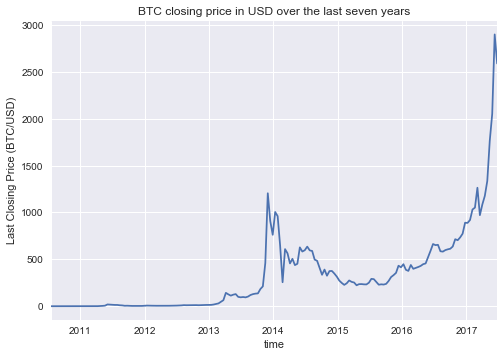

In [3]:
btc_usd_prices.asfreq('14D').closing_price.plot(style='-')
plt.ylabel('Last Closing Price (BTC/USD)')
plt.title('BTC closing price in USD over the last seven years')

# But hopefully you didn’t buy in February 2014…

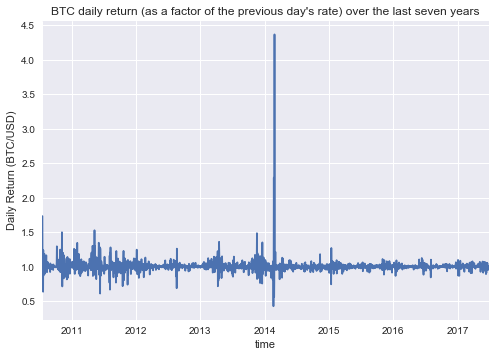

In [4]:
daily_factor = btc_usd_prices.closing_price / btc_usd_prices.shift(1).closing_price
daily_factor.plot()
plt.ylabel('Daily Return (BTC/USD)')
plt.title("BTC daily return (as a factor of the previous day's rate) over the last seven years")

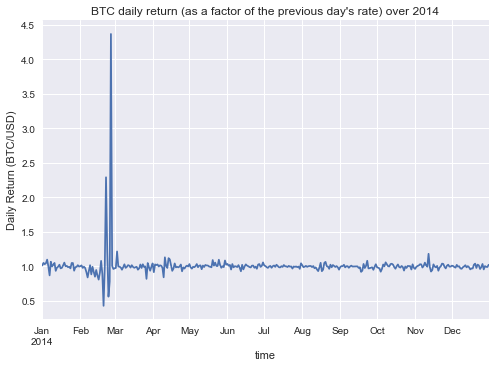

In [5]:
daily_factor.loc['2014-01-01':'2014-12-31'].plot()
plt.ylabel('Daily Return (BTC/USD)')
plt.title("BTC daily return (as a factor of the previous day's rate) over 2014")

# Goodbye China, hello Japan

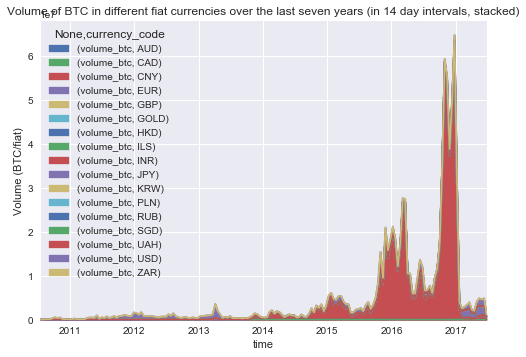

In [101]:
# Pandas can do area charts, but not stacked bar charts well
plot_data = btc_prices[['currency_code','volume_btc']].pivot_table(index=['time'], columns = ['currency_code']).resample('14D').sum()
plot_data.plot.area()
plt.ylabel("Volume (BTC/fiat)")
plt.title("Volume of BTC in different fiat currencies over the last seven years (in 14 day intervals, stacked)")

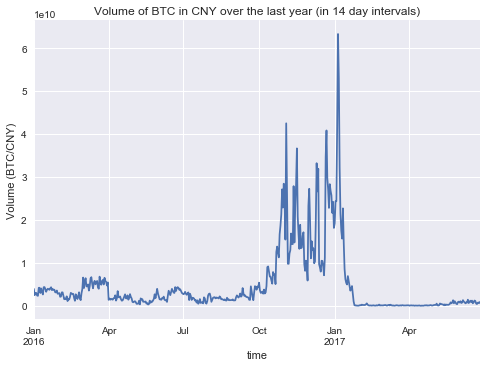

In [57]:
## Note: Graph says in 14 day intervals but it actually took all the data
plot_data = btc_prices[btc_prices['currency_code'] == 'CNY'].loc['2016-01-01':]#.resample('14D').sum()
plot_data.volume_currency.plot()
plt.ylabel("Volume (BTC/CNY)")
plt.title("Volume of BTC in CNY over the last year (in 14 day intervals)")

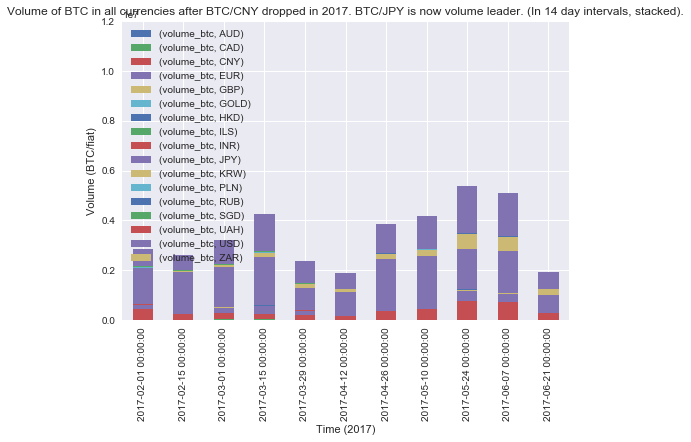

In [104]:
## Another stacked bar chart
plot_data = btc_prices.loc['2017-02-01':]
plot_data = plot_data[['currency_code','volume_btc']].pivot_table(index=['time'], columns = ['currency_code']).resample('14D').sum()
plot_data.plot.bar(stacked='true')
plt.ylim(0,12000000)
plt.legend(loc='upper left')
plt.ylabel("Volume (BTC/fiat)")
plt.xlabel("Time (2017)")
plt.title("Volume of BTC in all currencies after BTC/CNY dropped in 2017. BTC/JPY is now volume leader. (In 14 day intervals, stacked).")

# Now, if you had invested $100 in ETH in January 2017….

In [42]:
crypto_prices = pd.read_csv('crypto_prices.csv')
index = pd.DatetimeIndex(crypto_prices.time).normalize()
crypto_prices.index = index
crypto_prices.drop('time', axis=1, inplace=True)

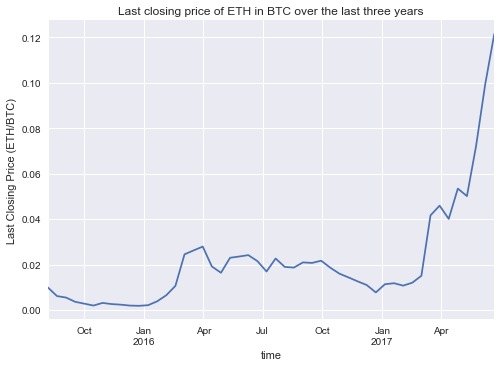

In [9]:
eth_prices = crypto_prices[crypto_prices['currency_code'] == 'ETH']
eth_prices = eth_prices.iloc[::-1]
eth_prices.asfreq('14D').closing_price.plot()
plt.ylabel('Last Closing Price (ETH/BTC)')
plt.title("Last closing price of ETH in BTC over the last three years")

In [10]:
df1 = btc_eur_prices.closing_price.rename('eur_price')
df2 = btc_cny_prices.closing_price.rename('cny_price')
df3 = btc_usd_prices.closing_price.rename('usd_price')
df = eth_prices.closing_price.rename('last_closing_price_in_btc')
result = pd.concat([df, df1, df2, df3], axis=1, join='inner')
result['last_closing_price_in_usd'] = result.last_closing_price_in_btc*result.usd_price
result['last_closing_price_in_eur'] = result.last_closing_price_in_btc*result.eur_price
result['last_closing_price_in_cny'] = result.last_closing_price_in_btc*result.cny_price

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10deb95f8>], dtype=object)

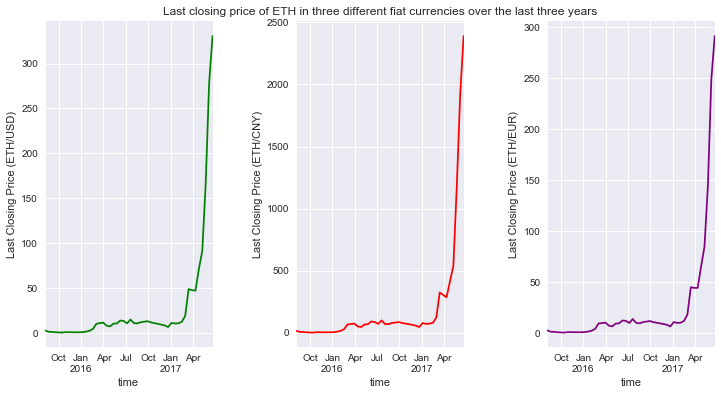

In [11]:
plot_data = result[['last_closing_price_in_usd','last_closing_price_in_cny','last_closing_price_in_eur']].asfreq('14D')

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes[1].set_title("Last closing price of ETH in three different fiat currencies over the last three years")
axes[0].set_ylabel('Last Closing Price (ETH/USD)')
axes[1].set_ylabel('Last Closing Price (ETH/CNY)')
axes[2].set_ylabel('Last Closing Price (ETH/EUR)')
plot_data.last_closing_price_in_usd.plot(subplots=True, ax=axes[0], legend=False, sharex=False, sharey=False, color='g')
plot_data.last_closing_price_in_cny.plot(subplots=True, ax=axes[1], legend=False, sharex=False, sharey=False, color='r')
plot_data.last_closing_price_in_eur.plot(subplots=True, ax=axes[2], legend=False, sharex=False, sharey=False, color='purple')

# What about the 1200 other cryptocurrencies??

In [12]:
subset_data = crypto_prices.reset_index()
subset_data = subset_data[['time','currency_code']]
subset_data.groupby('currency_code').min().sort_values(by='time',axis=0, ascending=False).head(n=20)

,time
currency_code,
CIR,2017-06-26
MDC,2017-06-26
NAS2,2017-06-26
NET,2017-06-26
TPAY,2017-06-26
XCI,2017-06-26
WBTC,2017-06-26
MRSA,2017-06-26
PAY,2017-06-19


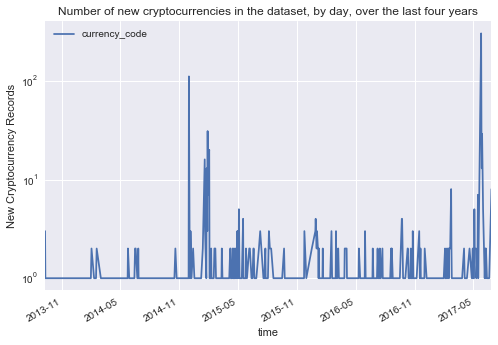

In [19]:
subset_data.groupby('currency_code').min().reset_index().groupby('time').count().plot(logy=True)
plt.title('Number of new cryptocurrencies in the dataset, by day, over the last four years')
plt.ylabel('New Cryptocurrency Records')

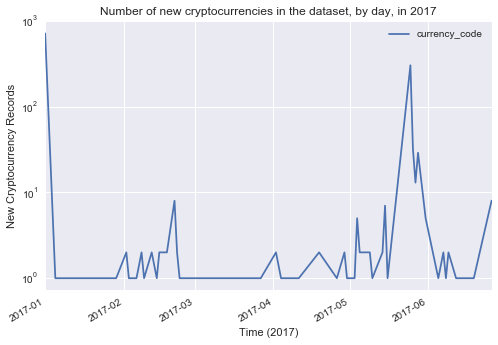

In [24]:
subset_data[subset_data['time'] >= '2017-01-01'].groupby('currency_code').min().reset_index().groupby('time').count().plot(logy=True)
plt.title('Number of new cryptocurrencies in the dataset, by day, in 2017')
plt.ylabel('New Cryptocurrency Records')
plt.xlabel('Time (2017)')

In [27]:
subset_data[subset_data['time'] >= '2017-01-01'].groupby('currency_code').min().reset_index().groupby('time').count().reset_index().sort_values(by='time',axis=0, ascending=False).head(n=20)

,time,currency_code
65,2017-06-26,8
64,2017-06-19,1
63,2017-06-18,1
62,2017-06-17,1
61,2017-06-16,1
60,2017-06-12,1
59,2017-06-09,2
58,2017-06-08,1
57,2017-06-07,2
56,2017-06-05,1


# Who’s at the head of the cryptocurrency long tail?

In [52]:
crypto_frame = crypto_prices[['volume_btc','currency_code']].loc['2017-06-20':]
btc_frame = btc_usd_prices['closing_price'].loc['2017-06-20':]
btc_rows = pd.DataFrame(btc_usd_prices['volume_currency'].loc['2017-06-20':].rename('total_volume_in_usd'))
btc_rows['currency_code'] = 'BTC'
joint_frame = pd.concat([crypto_frame,btc_frame], axis=1, join_axes=[crypto_frame.index])
joint_frame['total_volume_in_usd'] = joint_frame.closing_price*joint_frame.volume_btc
final_frame = pd.concat([joint_frame,btc_rows])
graph_data = final_frame.groupby('currency_code').sum().total_volume_in_usd.sort_values(axis=0, ascending=False).head(n=10)
graph_data

currency_code
BTC     2.040879e+09
ETH     3.764464e+08
LTC     7.863157e+07
XRP     6.012869e+07
ETC     2.945887e+07
ANS     2.906725e+07
SC      1.959568e+07
ZEC     1.696296e+07
DASH    1.664483e+07
VIA     1.573541e+07
Name: total_volume_in_usd, dtype: float64

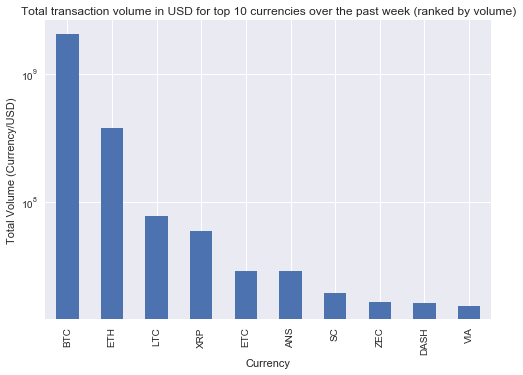

In [58]:
graph_data.plot(kind='bar',logy=True)
plt.xlabel('Currency')
plt.ylabel('Total Volume (Currency/USD)')
plt.title('Total transaction volume in USD for top 10 currencies over the past week (ranked by volume)')

# What are the most profitable cryptocurrencies?

In [39]:
crypto_prices['daily_return'] = crypto_prices['closing_price']/crypto_prices['opening_price']
result = crypto_prices[crypto_prices['daily_return'] == crypto_prices.groupby(crypto_prices.index)['daily_return'].transform(max)][['currency_code','daily_return']]
result.head(n=30)

,currency_code,daily_return
time,,
2017-06-26,CIN,40.142857
2017-06-25,KC,38.000000
2017-06-24,VOYA,14.274725
2017-06-23,PAY,3.185063
2017-06-22,YOVI,119.607843
2017-06-21,ION,7.976654
2017-06-20,TES,5.251572
2017-06-19,YOVI,1758.666667
2017-06-18,ZNY,22.521739


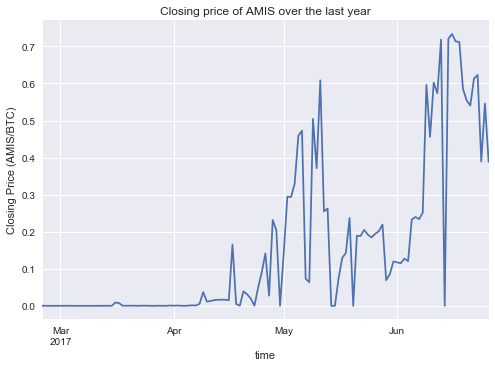

In [46]:
crypto_prices[crypto_prices['currency_code'] == 'AMIS'].sort_index().closing_price.plot()
plt.ylabel('Closing Price (AMIS/BTC)')
plt.title("Closing price of AMIS over the last year")

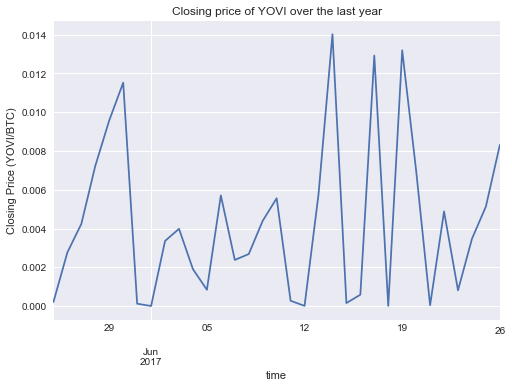

In [47]:
crypto_prices[crypto_prices['currency_code'] == 'YOVI'].sort_index().closing_price.plot()
plt.ylabel('Closing Price (YOVI/BTC)')
plt.title("Closing price of YOVI over the last year")

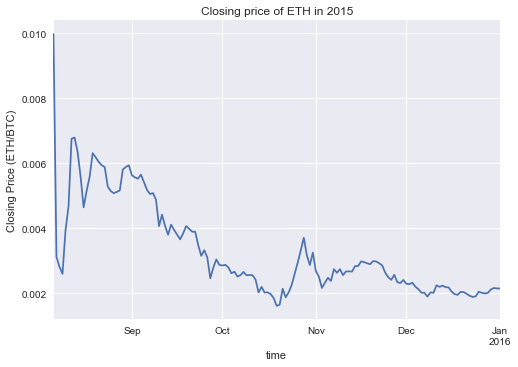

In [50]:
crypto_prices[crypto_prices['currency_code'] == 'ETH'].sort_index().loc[:'2016-01-01'].closing_price.plot()
plt.ylabel('Closing Price (ETH/BTC)')
plt.title("Closing price of ETH in 2015")